# Utilizando o DALL-E 2 para gerar imagens a partir de descrições em linguagem natural
Esse notebook foi criado originalmente por [cauetron](https://github.com/cauetron) com o objetivo de facilitar o acesso ao beta da API do DALL-E para pessoas com pouco ou nenhum conhecimento na área de computação. Não é necessário nenhum conhecimento prévio em Python, mas pode ser necessário algum do Google Colab. Caso tenha alguma dúvida ou dificuldade, sinta-se à vontade para entrar em contato comigo pelo discord cauetron#3263


## Códigos necessários

#### Você não precisa editar nada aqui, só lembre de executar a célula abaixo sempre que inicializar um novo Runtime no Google Colab



In [1]:
# Imports necessários
!pip install openai

import os
import openai
import requests
from google.colab import files as FILE
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Estrutura dos nomes das imagens
img_prefix = "img-openai-"
img_counter = 0

# Função para gerar a imagem consultando a API do OpenAI
def gerar_imagem(descricao):
  global img_counter
  
  response = openai.Image.create(
    prompt=descricao,
    n=1,
    size="1024x1024" # Você pode mudar o tamanho da imagem aqui
  )
  image_url = response['data'][0]['url']

  img_data = requests.get(image_url).content
  img_name = f"{img_prefix + str(img_counter)}.png"

  with open(img_name, 'wb') as handler:
    handler.write(img_data)
    img_counter += 1

  img_file = cv2.imread(img_name)[:,:,::-1]
  plt.figure(figsize=(20,12))
  plt.imshow(img_file)
  plt.title(descricao, fontweight ="bold")
  plt.show()
  print("Esse é só um preview, a imagem em alta qualidade deve ser acessada \
  (e baixada) pelo link abaixo:")
  print(image_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 39.5 MB/s 
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55880 sha256=c2686400306964d07bc9b5442fd1768c7dfe5dcd48d6894d24f6f22d8a5e58c0
  Stored in directory: /root/.cache/pip/wheels/19/de/db/e82770b480ec30fd4a6d67108744b9c52be167c04fcf4af7b5
Successfully built openai


## Instruções gerais
#### Essa parte é importante. Você vai precisar colocar algumas informações na primeira vez que utilizar esse notebook, depois disso isso elas já ficarão salvas. 
#### 💡 Lembre-se de removê-las antes de compartilhar esse notebook com alguém. 

### Adicione aqui as credenciais da API do [OpenAI](https://openai.com/api/)
É importante ressaltar que você não deve compartilhar essas chaves com ninguém, se quiser compartilhar esse notebook, remova antes as chaves da célula abaixo.

In [2]:
# Acesse o código aqui: https://beta.openai.com/account/org-settings 
openai.organization = "coloque o codigo dentro dessas aspas"
# Acesse a chave aqui: https://beta.openai.com/account/api-keys
openai.api_key = "coloque a chave dentro dessas aspas"

Após adicionar as chaves, execute o bloco de código anterior, assim como você fez no primeiro bloco.

### Instruções de como gerar uma imagem utilizando o [DALL-E 2](https://openai.com/dall-e-2/)


#### Para gerar uma imagem você vai precisar criar um bloco de código clicando no botão ``+ Code`` e dentro dele chamar a função ``gerar_imagem()`` colocando dentro dos parênteses, e entre aspas, a descrição da imagem (em inglês ou português), da seguinte forma:

```
gerar_imagem("descrição da imagem a ser desenhada pelo computador")
```

#### 🔴 Importante: Você está usando o ambiente do Google Colab, os códigos executados aqui rodam na nuvem, de forma completamente isolada do seu computador. As imagens geradas ficam salvas nesse ambiente durante a sessão ativa, elas vão sumir quando você for desconectado. Portanto, para salvá-las de forma permanente no seu computador você deve clicar no link que aparecerá debaixo das imagens geradas, ou baixá-las pelo gerenciador de arquivos na aba a esquerda.



#### Segue alguns exemplos abaixo
##### Note que nesses exemplos os links foram removidos, mas aparecerão nas imagens que você gerar

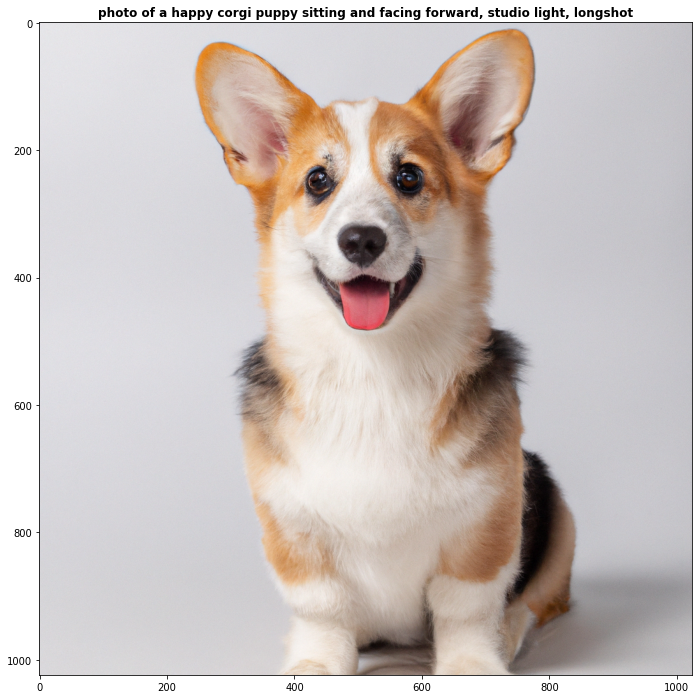

In [3]:
gerar_imagem("photo of a happy corgi puppy sitting and facing forward, studio light, longshot")

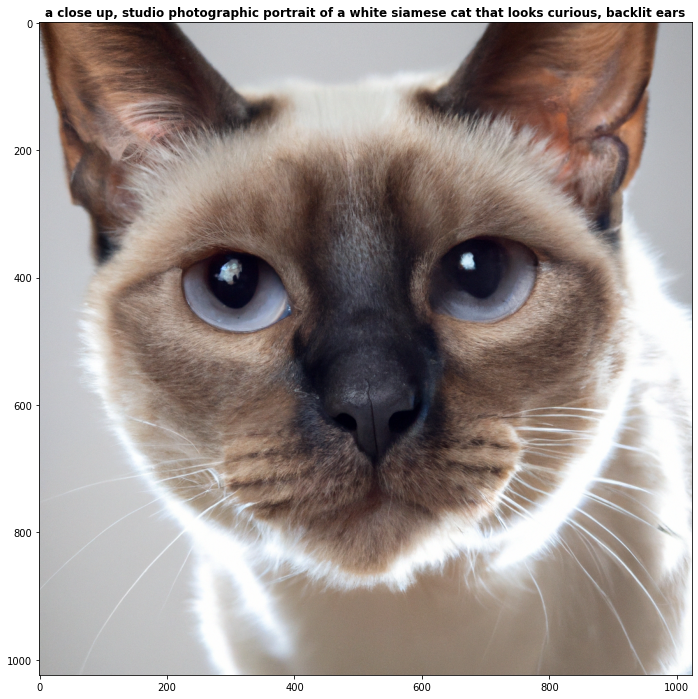

In [4]:
gerar_imagem("a close up, studio photographic portrait of a white siamese cat that looks curious, backlit ears")

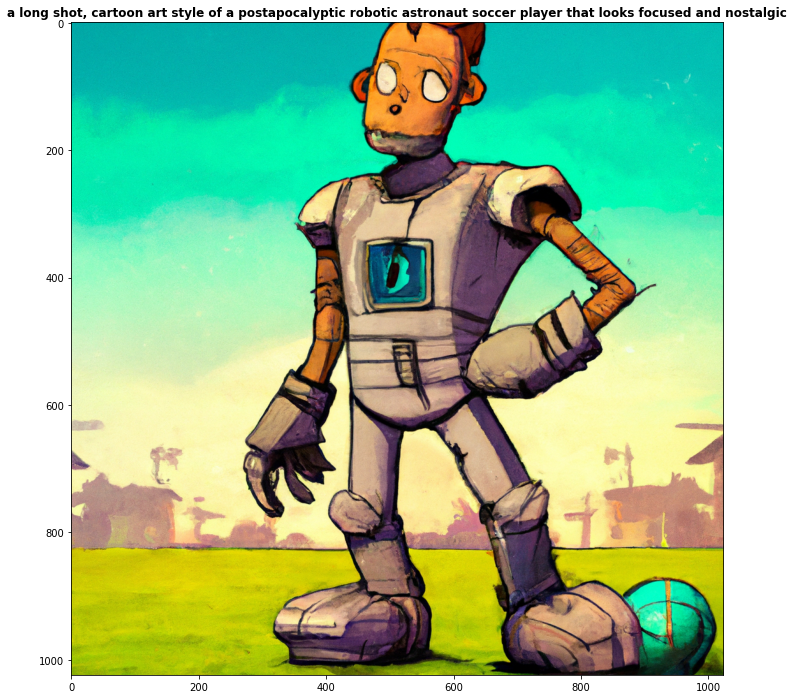

In [5]:
gerar_imagem("a long shot, cartoon art style of a postapocalyptic robotic astronaut soccer player that looks focused and nostalgic")

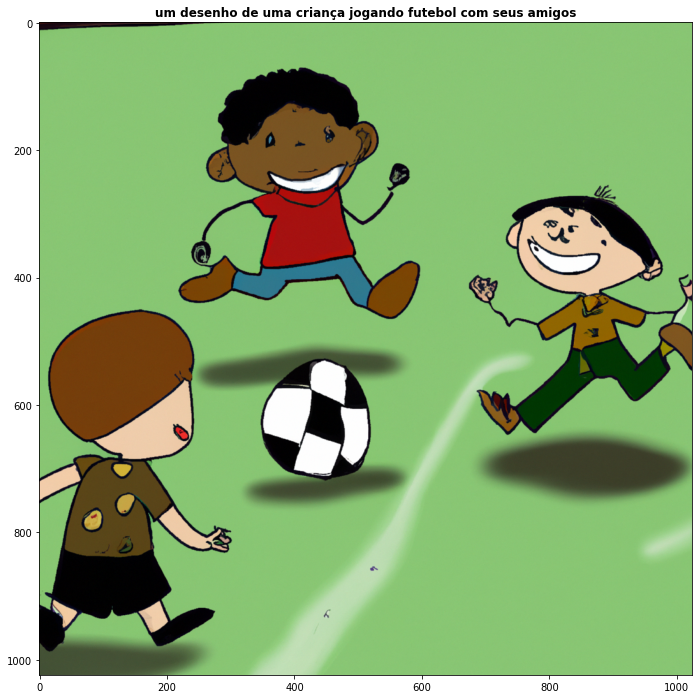

In [7]:
gerar_imagem("um desenho de uma criança jogando futebol com seus amigos")

## Comece a criar a partir daqui
#### Divirta-se 😉

In [ ]:
gerar_imagem("digite sua descrição aqui")